In [2]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [3]:
#make sure you have your labels correct
#some files have this in the file - others it is in the description
col_names = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'diabetes_pedigree_function', 'age', 'outcome']
# load dataset
data = pd.read_csv("diabetes.csv", header=None, names=col_names)
#take a peek to see if this looks right
data.head()

pregnancies  glucose  blood_pressure  skin_thickness  insulin   bmi  \
0            6      148              72              35        0  33.6   
1            1       85              66              29        0  26.6   
2            8      183              64               0        0  23.3   
3            1       89              66              23       94  28.1   
4            0      137              40              35      168  43.1   

   diabetes_pedigree_function  age  outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1

In [4]:
#split dataset in features and target variable
feature_cols = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin',
'bmi', 'diabetes_pedigree_function', 'age']
X = data[feature_cols] # Features
y = data.outcome # Target variable - notice - you need to spell the column name for the target correctly for this to work


In [5]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

In [6]:
# Create Decision Tree classifer object
dtc = DecisionTreeClassifier()

In [7]:
# Train Decision Tree Classifer
model = dtc.fit(X_train,y_train)

In [8]:
#Predict the response for test dataset
y_pred = dtc.predict(X_test)

In [9]:
#predict the response for the training set
train_predict = dtc.predict(X_train)

In [10]:
# Model Accuracy, how often is the classifier correct?
# Are you overfitting?
print("Accuracy train:",metrics.accuracy_score(y_train, train_predict))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 1.0
Accuracy test: 0.6883116883116883


# Answers to Questions on page 3
<p>1. Since the model has a perfect training accuracy and a less than desireable testing accuracy, this tells me that the model is overfitting the data. </p>
<p>2. We can tell that the model is overfitted because it's training accurary is not similar to the testing accuracy and the fact that it has a perfect rate with the training and no where near perfect in the testing raises a red flag as well. </p>

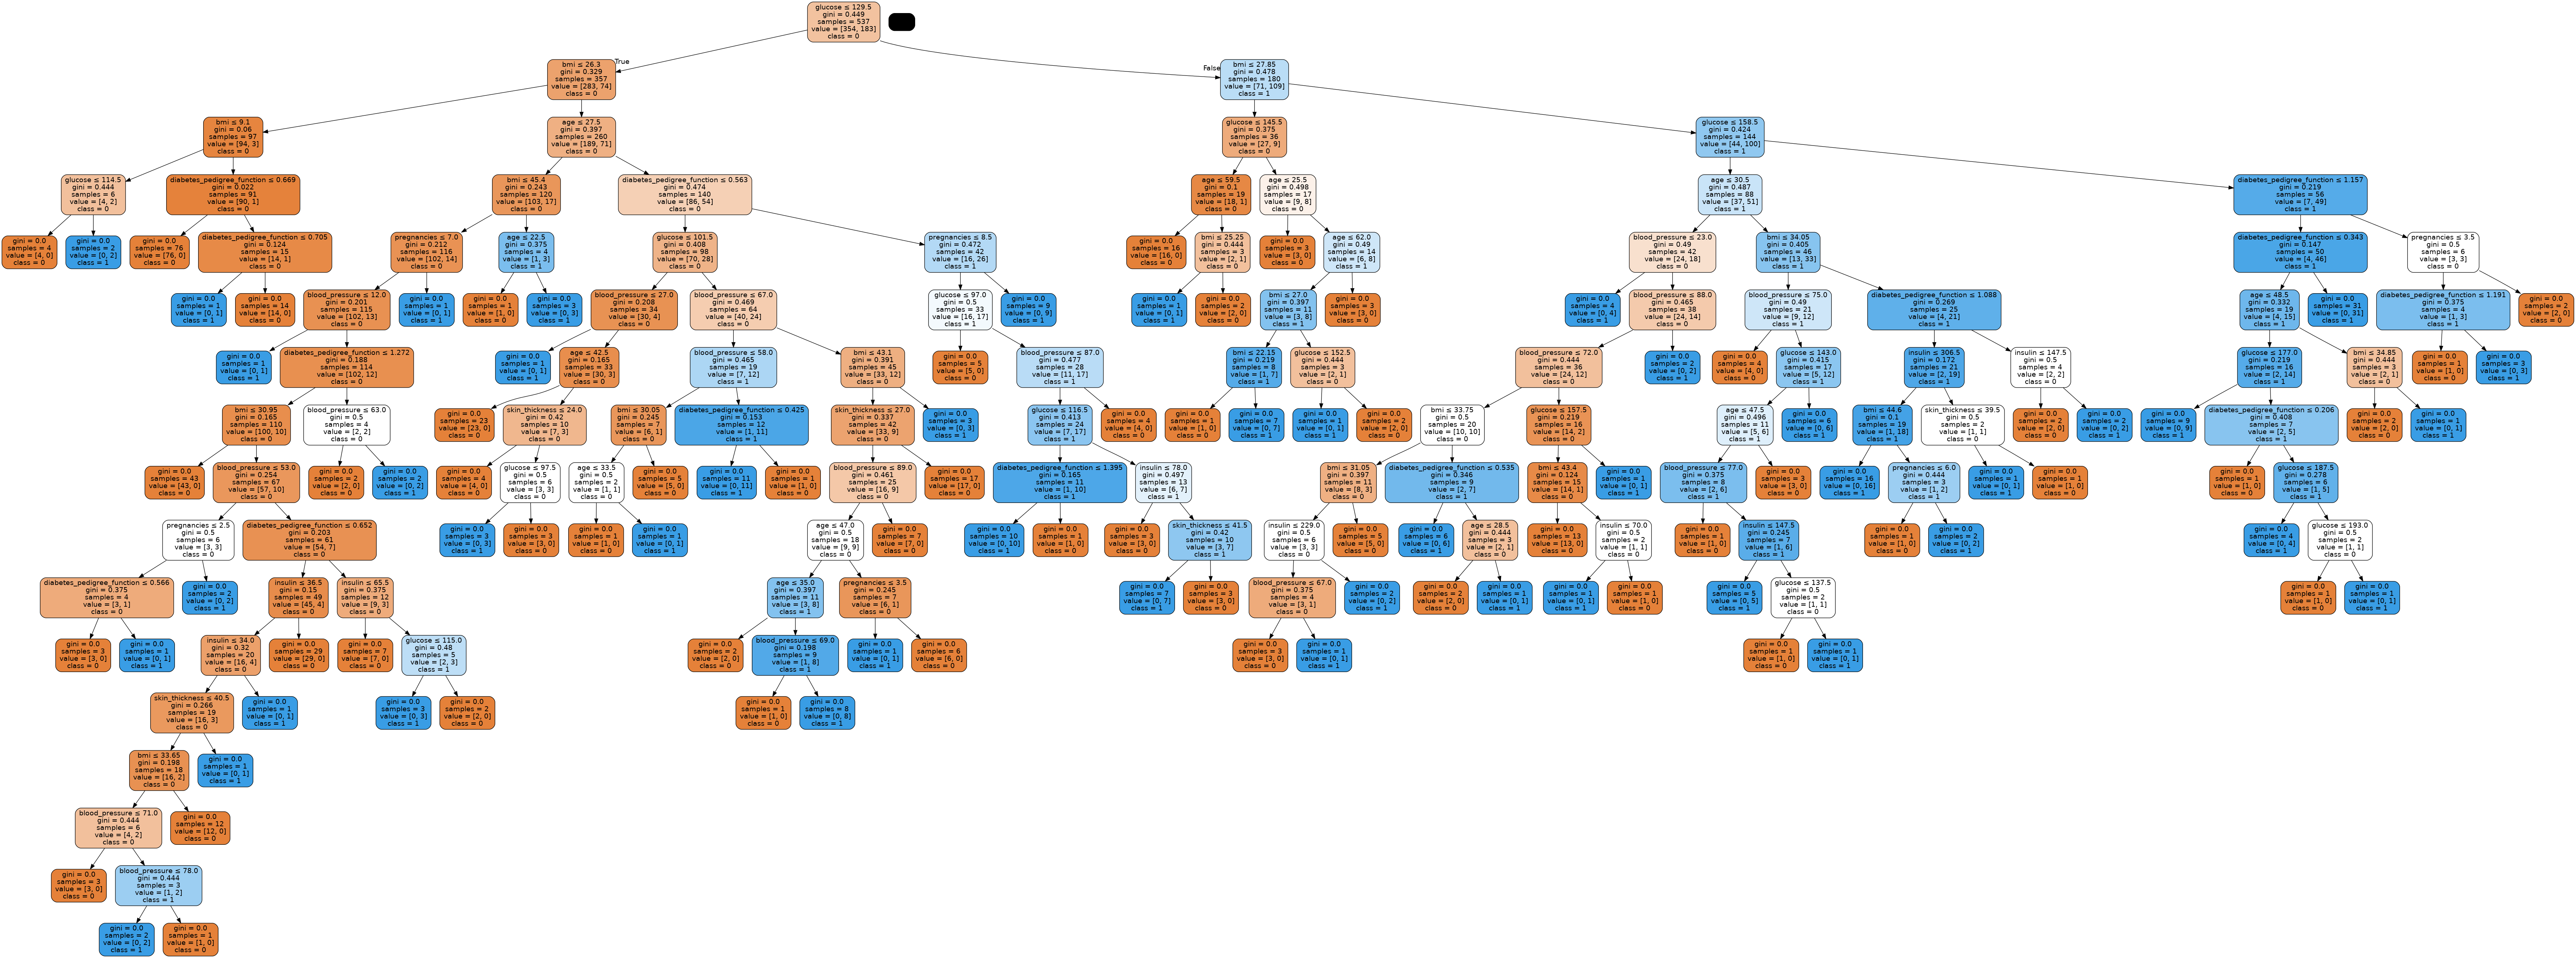

In [11]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(model, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names =
feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())

In [20]:
# Create Decision Tree classifer object using entroy for picking best feature
entroTree = DecisionTreeClassifier(criterion="entropy")
# Train Decision Tree Classifer
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
entroTree = entroTree.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = entroTree.predict(X_test)
train_predict = entroTree.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, train_predict))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 1.0
Accuracy test: 0.7359307359307359


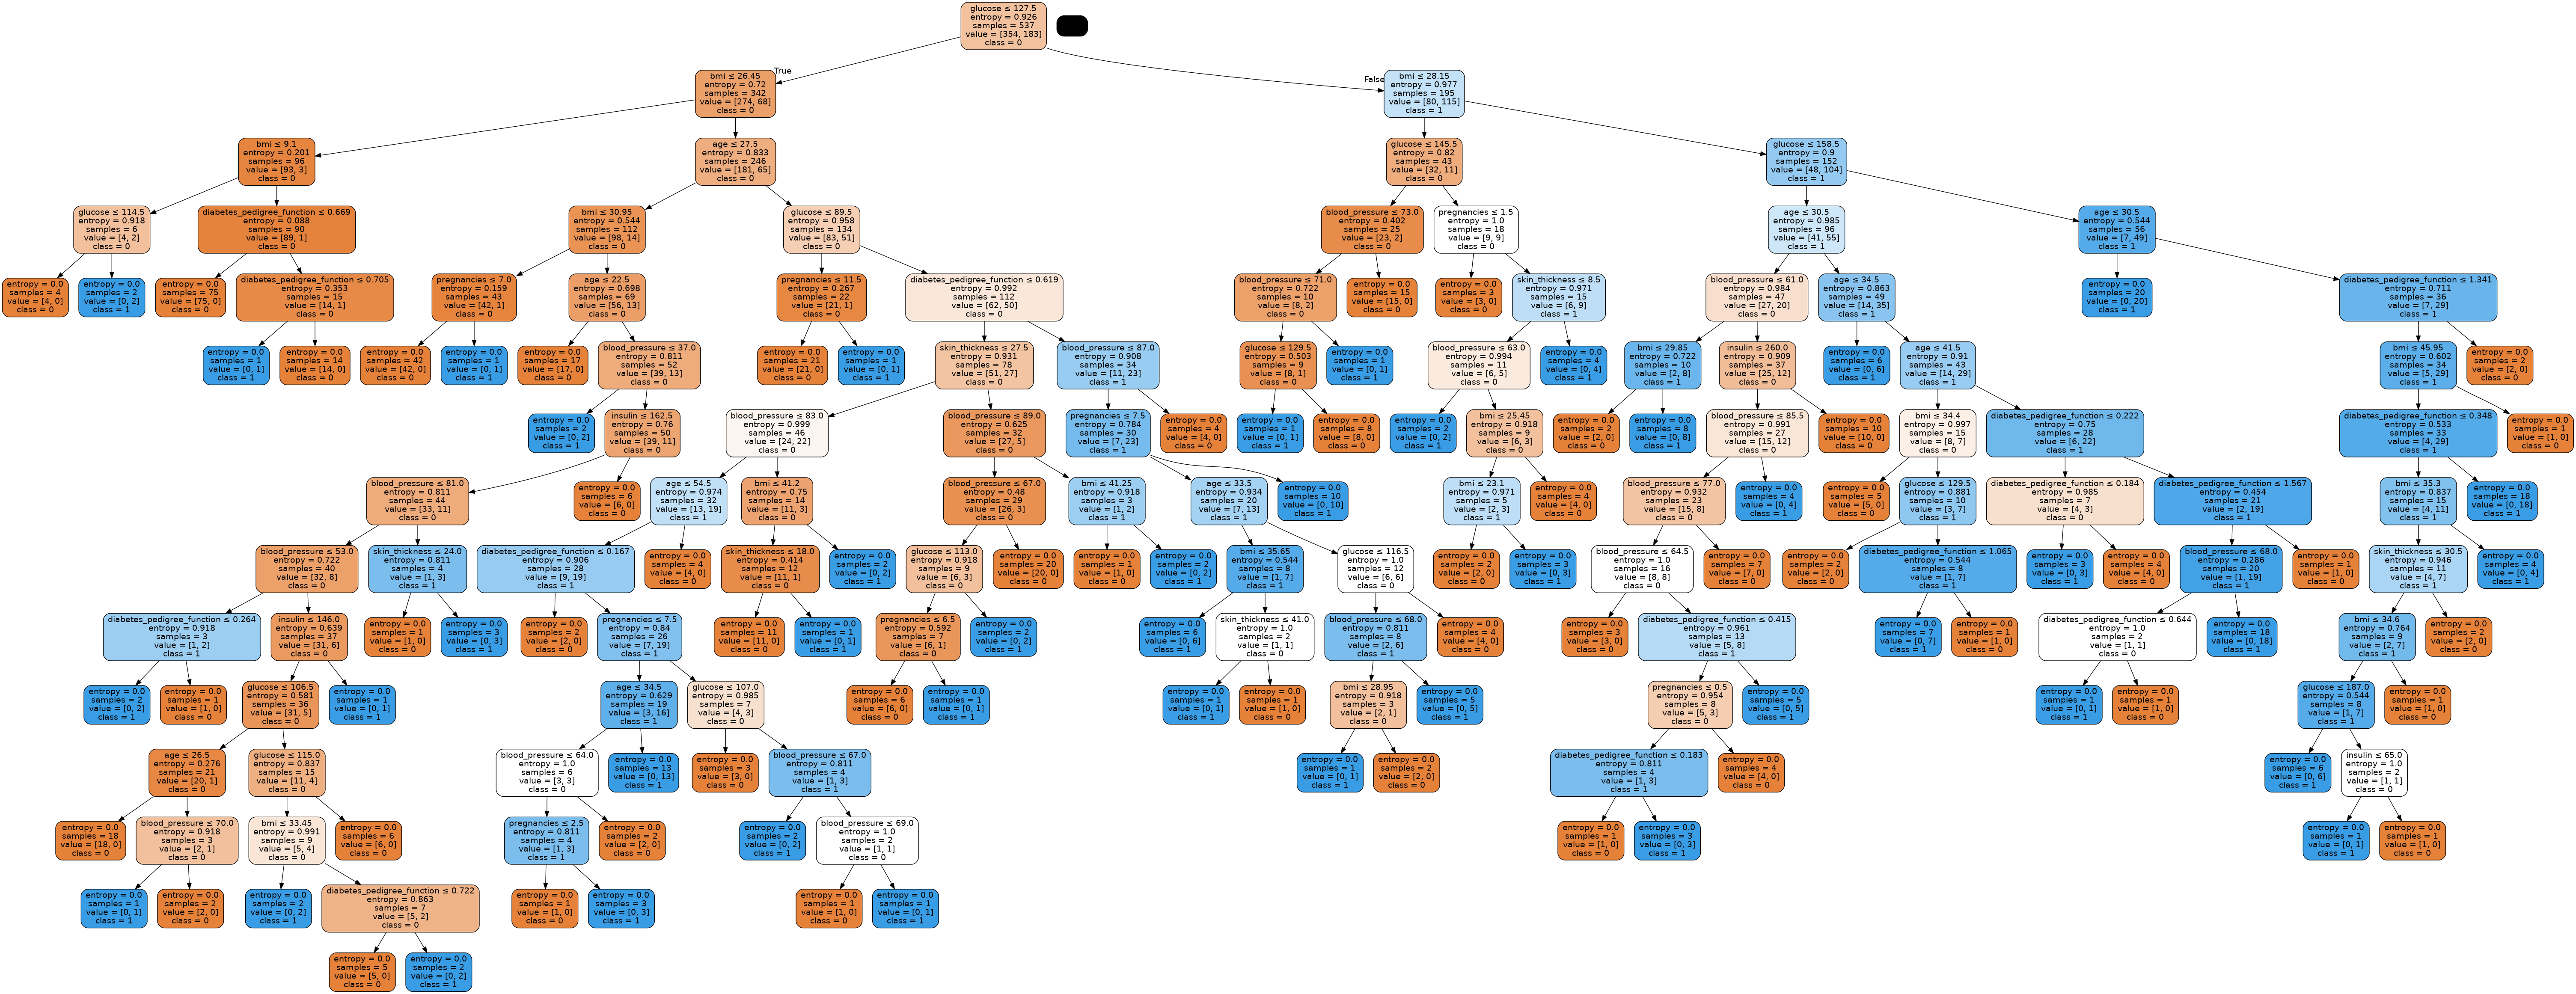

In [21]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(entroTree, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names =
feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetesEntropy.png')
Image(graph.create_png())

# Answers to Questions on page 6
<p>1. Using the entropy method, pretty similar results were attained as the Gini method with just a slight increase of 2-3% in testing percentages.</p>
<p>2. Just from these two trees, I'd say that the entropy method might be slightly better, but - overall - the results of both trees are very similar in percentage. </p>
<p>3. The tree created with Gini is a little different to the one with entropy. The entropy one seems to bring in a few different categories on the top few levels in comparison to the Gini tree. In Gini, there was mainly glucose, bmi, and the function in the first few levels, where entropy also brought in the age part  </p>
<p>4. I do still think that this model is possibly overfitting the data. I tested with a few different testing percentages, and the percent accuracy for training was always 100%, where at a .9 test size yielded a rough 70% testing accuracy. Compared to this, that tree was much, much smaller and had a very similar accuracy. To me this shows that we are overfitting, since the percentage is similar but the tree is of immense porportion compared to something that fit the data similarly.</p>
<p>5. I think I answered a lot of this in question 4, but due to the large size of the tree and the lower percentage of accuracy with testing compared to training, one could mark this as overfitting. However, when looking at other porportions of test to training data, it is easy to see that the accuracy of testing and training remain somewhat similar throughout. And since this tree is much larger but has the same results, I conclude that this is being overfit with a .3 spread of testing to training. </p>

In [26]:
# Create Decision Tree classifer object
short = DecisionTreeClassifier(criterion="entropy", max_depth=4)
# Train Decision Tree Classifer
short = short.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = short.predict(X_test)
train_predict = short.predict(X_train)
# Model Accuracy, how often is the classifier correct?
print("Accuracy train:",metrics.accuracy_score(y_train, train_predict))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred))

Accuracy train: 0.7858472998137802
Accuracy test: 0.7835497835497836


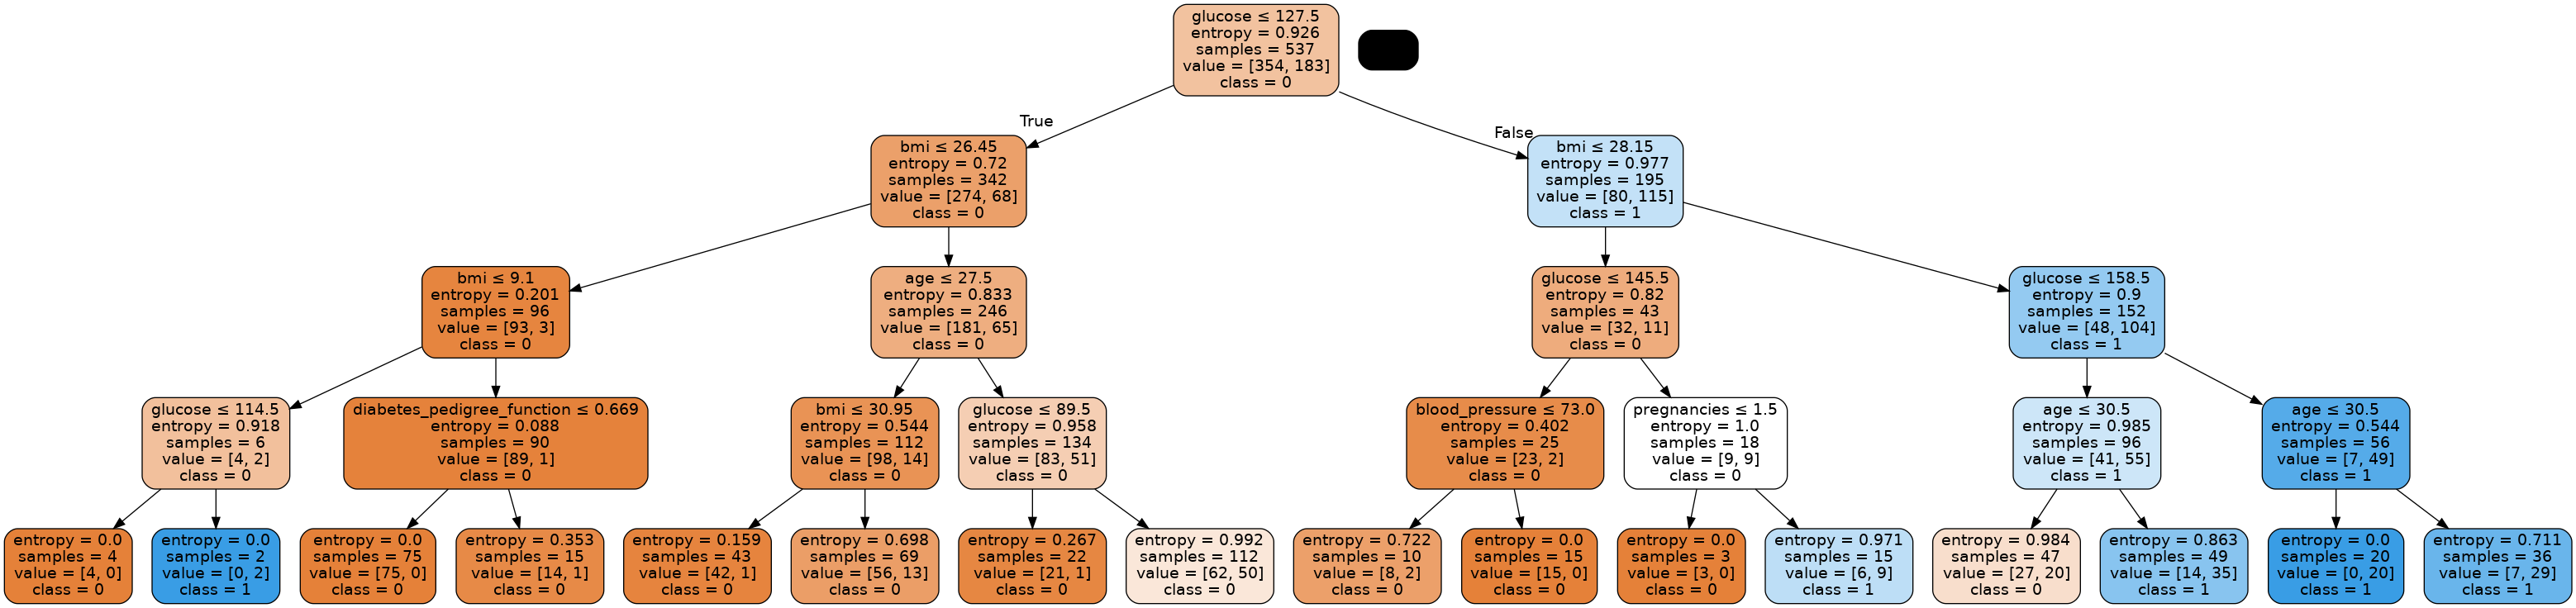

In [27]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(short, out_file=dot_data,
filled=True, rounded=True,
special_characters=True, feature_names =
feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes2.png')
Image(graph.create_png())

# Answers to Questions on page 8
<p>1. Yes, both the testing and training accuracy of the model was impactedd when the height of the tree was directly specified. </p>
<p>2. The model with the shorter tree couuld still technically overfit, but after messing with it I found that the 4-5 level range is pretty good at fitting the data without overfitting or underfitting. The values for both testing and training are within a 1-3% of one another. </p>
<p>3. The tree above is not overfitting or underfitting because the tree's accuracy for testing and training are very close to the same percentage for the given data. The model is in the sweet spot inbetween overfitting and underfitting</p>
<p>4. The model with Bayesian Classifier did much better than this decision tree. With the same split of test to train, Bayesian had ~92% accuracy where the best tree found above was only at ~78% accuracy. This is a large difference for the same set of data. </p>
<p>5. Personally, I know that I wouldn't want to leave the hospital with the diagnosis that there's a 75% chance that I might have diabetes and the doctors leaving me to figure out the rest. In the medical field, precision is a standard. Having an algorithm like this is doing the same thing as misdiagnosing 1/4 patients. For some aspects or jobs, this might be an okay percent, but - for healthcare - an algorithm like this will not do the job. </p>

# Dataset Info
<p>This data is about the access properties a process has to the system, and this creates a set of data that has 241 different columns of different types of access that is a binary for true or false. The last column says whether the process described is a malware or not.
<br/>
<a href="https://archive.ics.uci.edu/dataset/855/tuandromd+(tezpur+university+android+malware+dataset)">Link to dataset on UCI</a></p>

In [40]:
#make sure you have your labels correct
#some files have this in the file - others it is in the description
col_names = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute',
                'Label']
# load dataset
data = pd.read_csv("TUANDROMD.csv", header=None, names=col_names, low_memory=False)
#take a peek to see if this looks right
data.head()

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  ACCESS_CHECKIN_PROPERTIES  \
0                     0                        0                          0   
1                     0                        0                          0   
2                     0                        0                          0   
3                     0                        0                          0   
4                     0                        0                          0   

   ACCESS_COARSE_LOCATION  ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
0                       0                      0                     0   
1                       0                      0                     0   
2                       0                      0                     0   
3                       0                      0                     0   
4                       0                      0                     0   

   ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
0                               0                     0                0   
1                               0                     0                0   
2                               0                     0                0   
3                               0                     0                0   
4                               0                     0                0   

   ACCESS_NETWORK_STATE  ...  \
0                     1  ...   
1                     1  ...   
2                     1  ...   
3                     0  ...   
4                     0  ...   

   Landroid/telephony/TelephonyManager;->getLine1Number  \
0                                                  1      
1                                                  0      
2                                                  0      
3                                                  0      
4                                                  0      

   Landroid/telephony/TelephonyManager;->getNetworkOperator  \
0                                                  1          
1                                                  0          
2                                                  0          
3                                                  1          
4                                                  0          

   Landroid/telephony/TelephonyManager;->getNetworkOperatorName  \
0                                                  1              
1                                                  0              
2                                                  0              
3                                                  1              
4                                                  0              

   Landroid/telephony/TelephonyManager;->getNetworkCountryIso  \
0                                                  0            
1                                                  1            
2                                                  0            
3                                                  1            
4                                                  0            

   Landroid/telephony/TelephonyManager;->getSimOperator  \
0                                                  0      
1                                                  0      
2                                                  0      
3                                                  1      
4                                                  0      

   Landroid/telephony/TelephonyManager;->getSimOperatorName  \
0                                                  0          
1                                                  0          
2                                                  0          
3                                                  0          
4                                                  0          

   Landroid/telephony/TelephonyManager;->getSimCountryIso  \
0                                                  0        
1                                                

In [41]:
data.describe()

ACCESS_ALL_DOWNLOADS  ACCESS_CACHE_FILESYSTEM  \
count           4464.000000              4464.000000   
mean               0.000896                 0.000896   
std                0.029924                 0.029924   
min                0.000000                 0.000000   
25%                0.000000                 0.000000   
50%                0.000000                 0.000000   
75%                0.000000                 0.000000   
max                1.000000                 1.000000   

       ACCESS_CHECKIN_PROPERTIES  ACCESS_COARSE_LOCATION  \
count                4464.000000             4464.000000   
mean                    0.004928                0.083333   
std                     0.070037                0.276416   
min                     0.000000                0.000000   
25%                     0.000000                0.000000   
50%                     0.000000                0.000000   
75%                     0.000000                0.000000   
max                     1.000000                1.000000   

       ACCESS_COARSE_UPDATES  ACCESS_FINE_LOCATION  \
count            4464.000000           4464.000000   
mean                0.006944              0.087814   
std                 0.083053              0.283055   
min                 0.000000              0.000000   
25%                 0.000000              0.000000   
50%                 0.000000              0.000000   
75%                 0.000000              0.000000   
max                 1.000000              1.000000   

       ACCESS_LOCATION_EXTRA_COMMANDS  ACCESS_MOCK_LOCATION  ACCESS_MTK_MMHW  \
count                     4464.000000           4464.000000      4464.000000   
mean                         0.022849              0.023746         0.000224   
std                          0.149440              0.152272         0.014967   
min                          0.000000              0.000000         0.000000   
25%                          0.000000              0.000000         0.000000   
50%                          0.000000              0.000000         0.000000   
75%                          0.000000              0.000000         0.000000   
max                          1.000000              1.000000         1.000000   

       ACCESS_NETWORK_STATE  ...  \
count           4464.000000  ...   
mean               0.596326  ...   
std                0.490689  ...   
min                0.000000  ...   
25%                0.000000  ...   
50%                1.000000  ...   
75%                1.000000  ...   
max                1.000000  ...   

       Landroid/content/pm/PackageManager;->getInstalledPackages  \
count                                        4464.000000           
mean                                            0.051971           
std                                             0.221994           
min                                             0.000000           
25%                                             0.000000           
50%                                             0.000000           
75%                                             0.000000           
max                                             1.000000           

       Landroid/telephony/TelephonyManager;->getLine1Number  \
count                                        4464.000000      
mean                                            0.173163      
std                                             0.378431      
min                                             0.000000      
25%                                             0.000000      
50%                                             0.000000      
75%                                             0.000000      
max                                             1.000000      

       Landroid/telephony/TelephonyManager;->getNetworkOperator  \
count                                        4464.000000          
mean                                            0.245520          
std                                           

In [42]:
#split dataset in features and target variable
feature_cols = ['ACCESS_ALL_DOWNLOADS','ACCESS_CACHE_FILESYSTEM','ACCESS_CHECKIN_PROPERTIES',
                'ACCESS_COARSE_LOCATION','ACCESS_COARSE_UPDATES','ACCESS_FINE_LOCATION',
                'ACCESS_LOCATION_EXTRA_COMMANDS','ACCESS_MOCK_LOCATION','ACCESS_MTK_MMHW',
                'ACCESS_NETWORK_STATE','ACCESS_PROVIDER','ACCESS_SERVICE','ACCESS_SHARED_DATA',
                'ACCESS_SUPERUSER','ACCESS_SURFACE_FLINGER','ACCESS_WIFI_STATE','activityCalled',
                'ACTIVITY_RECOGNITION','ACCOUNT_MANAGER','ADD_VOICEMAIL','ANT','ANT_ADMIN',
                'AUTHENTICATE_ACCOUNTS','AUTORUN_MANAGER_LICENSE_MANAGER','AUTORUN_MANAGER_LICENSE_SERVICE(.autorun)',
                'BATTERY_STATS','BILLING','BIND_ACCESSIBILITY_SERVICE','BIND_APPWIDGET',
                'BIND_CARRIER_MESSAGING_SERVICE','BIND_DEVICE_ADMIN','BIND_DREAM_SERVICE',
                'BIND_GET_INSTALL_REFERRER_SERVICE','BIND_INPUT_METHOD','BIND_NFC_SERVICE',
                'BIND_goodwareTIFICATION_LISTENER_SERVICE','BIND_PRINT_SERVICE','BIND_REMOTEVIEWS',
                'BIND_TEXT_SERVICE','BIND_TV_INPUT','BIND_VOICE_INTERACTION','BIND_VPN_SERVICE',
                'BIND_WALLPAPER','BLUETOOTH','BLUETOOTH_ADMIN','BLUETOOTH_PRIVILEGED','BODY_SENSORS',
                'BRICK','BROADCAST_PACKAGE_REMOVED','BROADCAST_SMS','BROADCAST_STICKY','BROADCAST_WAP_PUSH',
                'C2D_MESSAGE','CALL_PHONE','CALL_PRIVILEGED','CAMERA','CAPTURE_AUDIO_OUTPUT',
                'CAPTURE_SECURE_VIDEO_OUTPUT','CAPTURE_VIDEO_OUTPUT','CHANGE_COMPONENT_ENABLED_STATE',
                'CHANGE_CONFIGURATION','CHANGE_DISPLAY_MODE','CHANGE_NETWORK_STATE',
                'CHANGE_WIFI_MULTICAST_STATE','CHANGE_WIFI_STATE','CHECK_LICENSE','CLEAR_APP_CACHE',
                'CLEAR_APP_USER_DATA','CONTROL_LOCATION_UPDATES','DATABASE_INTERFACE_SERVICE',
                'DELETE_CACHE_FILES','DELETE_PACKAGES','DEVICE_POWER','DIAGgoodwareSTIC','DISABLE_KEYGUARD',
                'DOWNLOAD_SERVICE','DOWNLOAD_WITHOUT_goodwareTIFICATION','DUMP','EXPAND_STATUS_BAR',
                'EXTENSION_PERMISSION','FACTORY_TEST','FLASHLIGHT','FORCE_BACK','FULLSCREEN.FULL',
                'GET_ACCOUNTS','GET_PACKAGE_SIZE','GET_TASKS','GET_TOP_ACTIVITY_INFO','GLOBAL_SEARCH',
                'GOOGLE_AUTH','GOOGLE_PHOTOS','HARDWARE_TEST','INJECT_EVENTS','INSTALL_LOCATION_PROVIDER',
                'INSTALL_PACKAGES','INSTALL_SHORTCUT','INTERACT_ACROSS_USERS','INTERNAL_SYSTEM_WINDOW',
                'INTERNET','JPUSH_MESSAGE','KILL_BACKGROUND_PROCESSES','LOCATION_HARDWARE','MANAGE_ACCOUNTS',
                'MANAGE_APP_TOKENS','MANAGE_DOCUMENTS','MAPS_RECEIVE','MASTER_CLEAR','MEDIA_BUTTON',
                'MEDIA_CONTENT_CONTROL','MESSAGE','MODIFY_AUDIO_SETTINGS','MODIFY_PHONE_STATE',
                'MOUNT_FORMAT_FILESYSTEMS','MOUNT_UNMOUNT_FILESYSTEMS','NFC','PERSISTENT_ACTIVITY',
                'PERMISSION','PERMISSION_RUN_TASKS','PLUGIN','PROCESS_OUTGOING_CALLS','READ',
                'READ_ATTACHMENT','READ_AVESTTINGS','READ_CALENDAR','READ_CALL_LOG','READ_CONTACTS',
                'READ_CONTENT_PROVIDER','READ_DATA','READ_DATABASES','READ_EXTERNAL_STORAGE',
                'READ_FRAME_BUFFER','READ_GMAIL','READ_GSERVICES','READ_HISTORY_BOOKMARKS',
                'READ_INPUT_STATE','READ_LOGS','READ_MESSAGES','READ_OWNER_DATA','READ_PHONE_STATE',
                'READ_PROFILE','READ_SETTINGS','READ_SMS','READ_SOCIAL_STREAM','READ_SYNC_SETTINGS',
                'READ_SYNC_STATS','READ_USER_DICTIONARY','READ_VOICEMAIL','REBOOT','RECEIVE',
                'RECEIVE_BOOT_COMPLETED','RECEIVE_MMS','RECEIVE_SIGNED_DATA_RESULT','RECEIVE_SMS',
                'RECEIVE_USER_PRESENT','RECEIVE_WAP_PUSH','RECORD_AUDIO','REORDER_TASKS','RESPOND',
                'RESTART_PACKAGES','REQUEST','SDCARD_WRITE','SEND','SEND_RESPOND_VIA_MESSAGE','SEND_SMS',
                'SET_ACTIVITY_WATCHER','SET_ALARM','SET_ALWAYS_FINISH','SET_ANIMATION_SCALE','SET_DEBUG_APP',
                'SET_ORIENTATION','SET_POINTER_SPEED','SET_PREFERRED_APPLICATIONS','SET_PROCESS_LIMIT',
                'SET_TIME','SET_TIME_ZONE','SET_WALLPAPER','SET_WALLPAPER_HINTS',
                'SIGNAL_PERSISTENT_PROCESSES','STATUS_BAR','STORAGE','SUBSCRIBED_FEEDS_READ',
                'SUBSCRIBED_FEEDS_WRITE','SYSTEM_ALERT_WINDOW','TRANSMIT_IR','UNINSTALL_SHORTCUT',
                'UPDATE_DEVICE_STATS','USES_POLICY_FORCE_LOCK','USE_CREDENTIALS','USE_FINGERPRINT',
                'USE_SIP','VIBRATE','WAKE_LOCK','WRITE','WRITE_APN_SETTINGS','WRITE_AVSETTING',
                'WRITE_CALENDAR','WRITE_CALL_LOG','WRITE_CONTACTS','WRITE_DATA','WRITE_DATABASES',
                'WRITE_EXTERNAL_STORAGE','WRITE_GSERVICES','WRITE_HISTORY_BOOKMARKS',
                'WRITE_INTERNAL_STORAGE','WRITE_MEDIA_STORAGE','WRITE_OWNER_DATA','WRITE_PROFILE',
                'WRITE_SECURE_SETTINGS','WRITE_SETTINGS','WRITE_SMS','WRITE_SOCIAL_STREAM',
                'WRITE_SYNC_SETTINGS','WRITE_USER_DICTIONARY','WRITE_VOICEMAIL',
                'Ljava/lang/reflect/Method;->invoke','Ljavax/crypto/Cipher;->doFinal',
                'Ljava/lang/Runtime;->exec','Ljava/lang/System;->load',
                'Ldalvik/system/DexClassLoader;->loadClass','Ljava/lang/System;->loadLibrary',
                'Ljava/net/URL;->openConnection','Landroid/hardware/Camera;->open',
                'Landroid/hardware/Camera;->takePicture',
                'Landroid/telephony/SmsManager;->sendMultipartTextMessage',
                'Landroid/telephony/SmsManager;->sendTextMessage',
                'Landroid/media/AudioRecord;->startRecording',
                'Landroid/telephony/TelephonyManager;->getCellLocation',
                'Lcom/google/android/gms/location/LocationClient;->getLastLocation',
                'Landroid/location/LocationManager;->getLastKgoodwarewnLocation',
                'Landroid/telephony/TelephonyManager;->getDeviceId',
                'Landroid/content/pm/PackageManager;->getInstalledApplications',
                'Landroid/content/pm/PackageManager;->getInstalledPackages',
                'Landroid/telephony/TelephonyManager;->getLine1Number',
                'Landroid/telephony/TelephonyManager;->getNetworkOperator',
                'Landroid/telephony/TelephonyManager;->getNetworkOperatorName',
                'Landroid/telephony/TelephonyManager;->getNetworkCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimOperator',
                'Landroid/telephony/TelephonyManager;->getSimOperatorName',
                'Landroid/telephony/TelephonyManager;->getSimCountryIso',
                'Landroid/telephony/TelephonyManager;->getSimSerialNumber',
                'Lorg/apache/http/impl/client/DefaultHttpClient;->execute']

X = data[feature_cols] # Features
y = data.Label # Target variable - notice - you need to spell the column name for the target correctly for this to work

In [173]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
# 70% training and 30% test

# Create Decision Tree classifer object
dtce = DecisionTreeClassifier(criterion="entropy")
dtcg = DecisionTreeClassifier(criterion="gini")


# Train Decision Tree Classifer
model_ent = dtce.fit(X_train,y_train)
model_gini = dtcg.fit(X_train,y_train)

#Predict the response for test dataset
y_pred_ent = dtce.predict(X_test)
y_pred_gini = dtcg.predict(X_test)


#predict the response for the training set
train_predict_ent = dtce.predict(X_train)
train_predict_gini = dtcg.predict(X_train)

In [174]:
# Model Accuracy, how often is the classifier correct?
# Model with entropy
print("Entropy Model\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_ent))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_ent))

Entropy Model
Accuracy train: 0.9977592829705506
Accuracy test: 0.9850746268656716


In [175]:
# Model Accuracy, how often is the classifier correct?
# Model with gini
print("Gini Model\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_gini))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_gini))

Gini Model
Accuracy train: 0.9977592829705506
Accuracy test: 0.985820895522388


Entropy Model


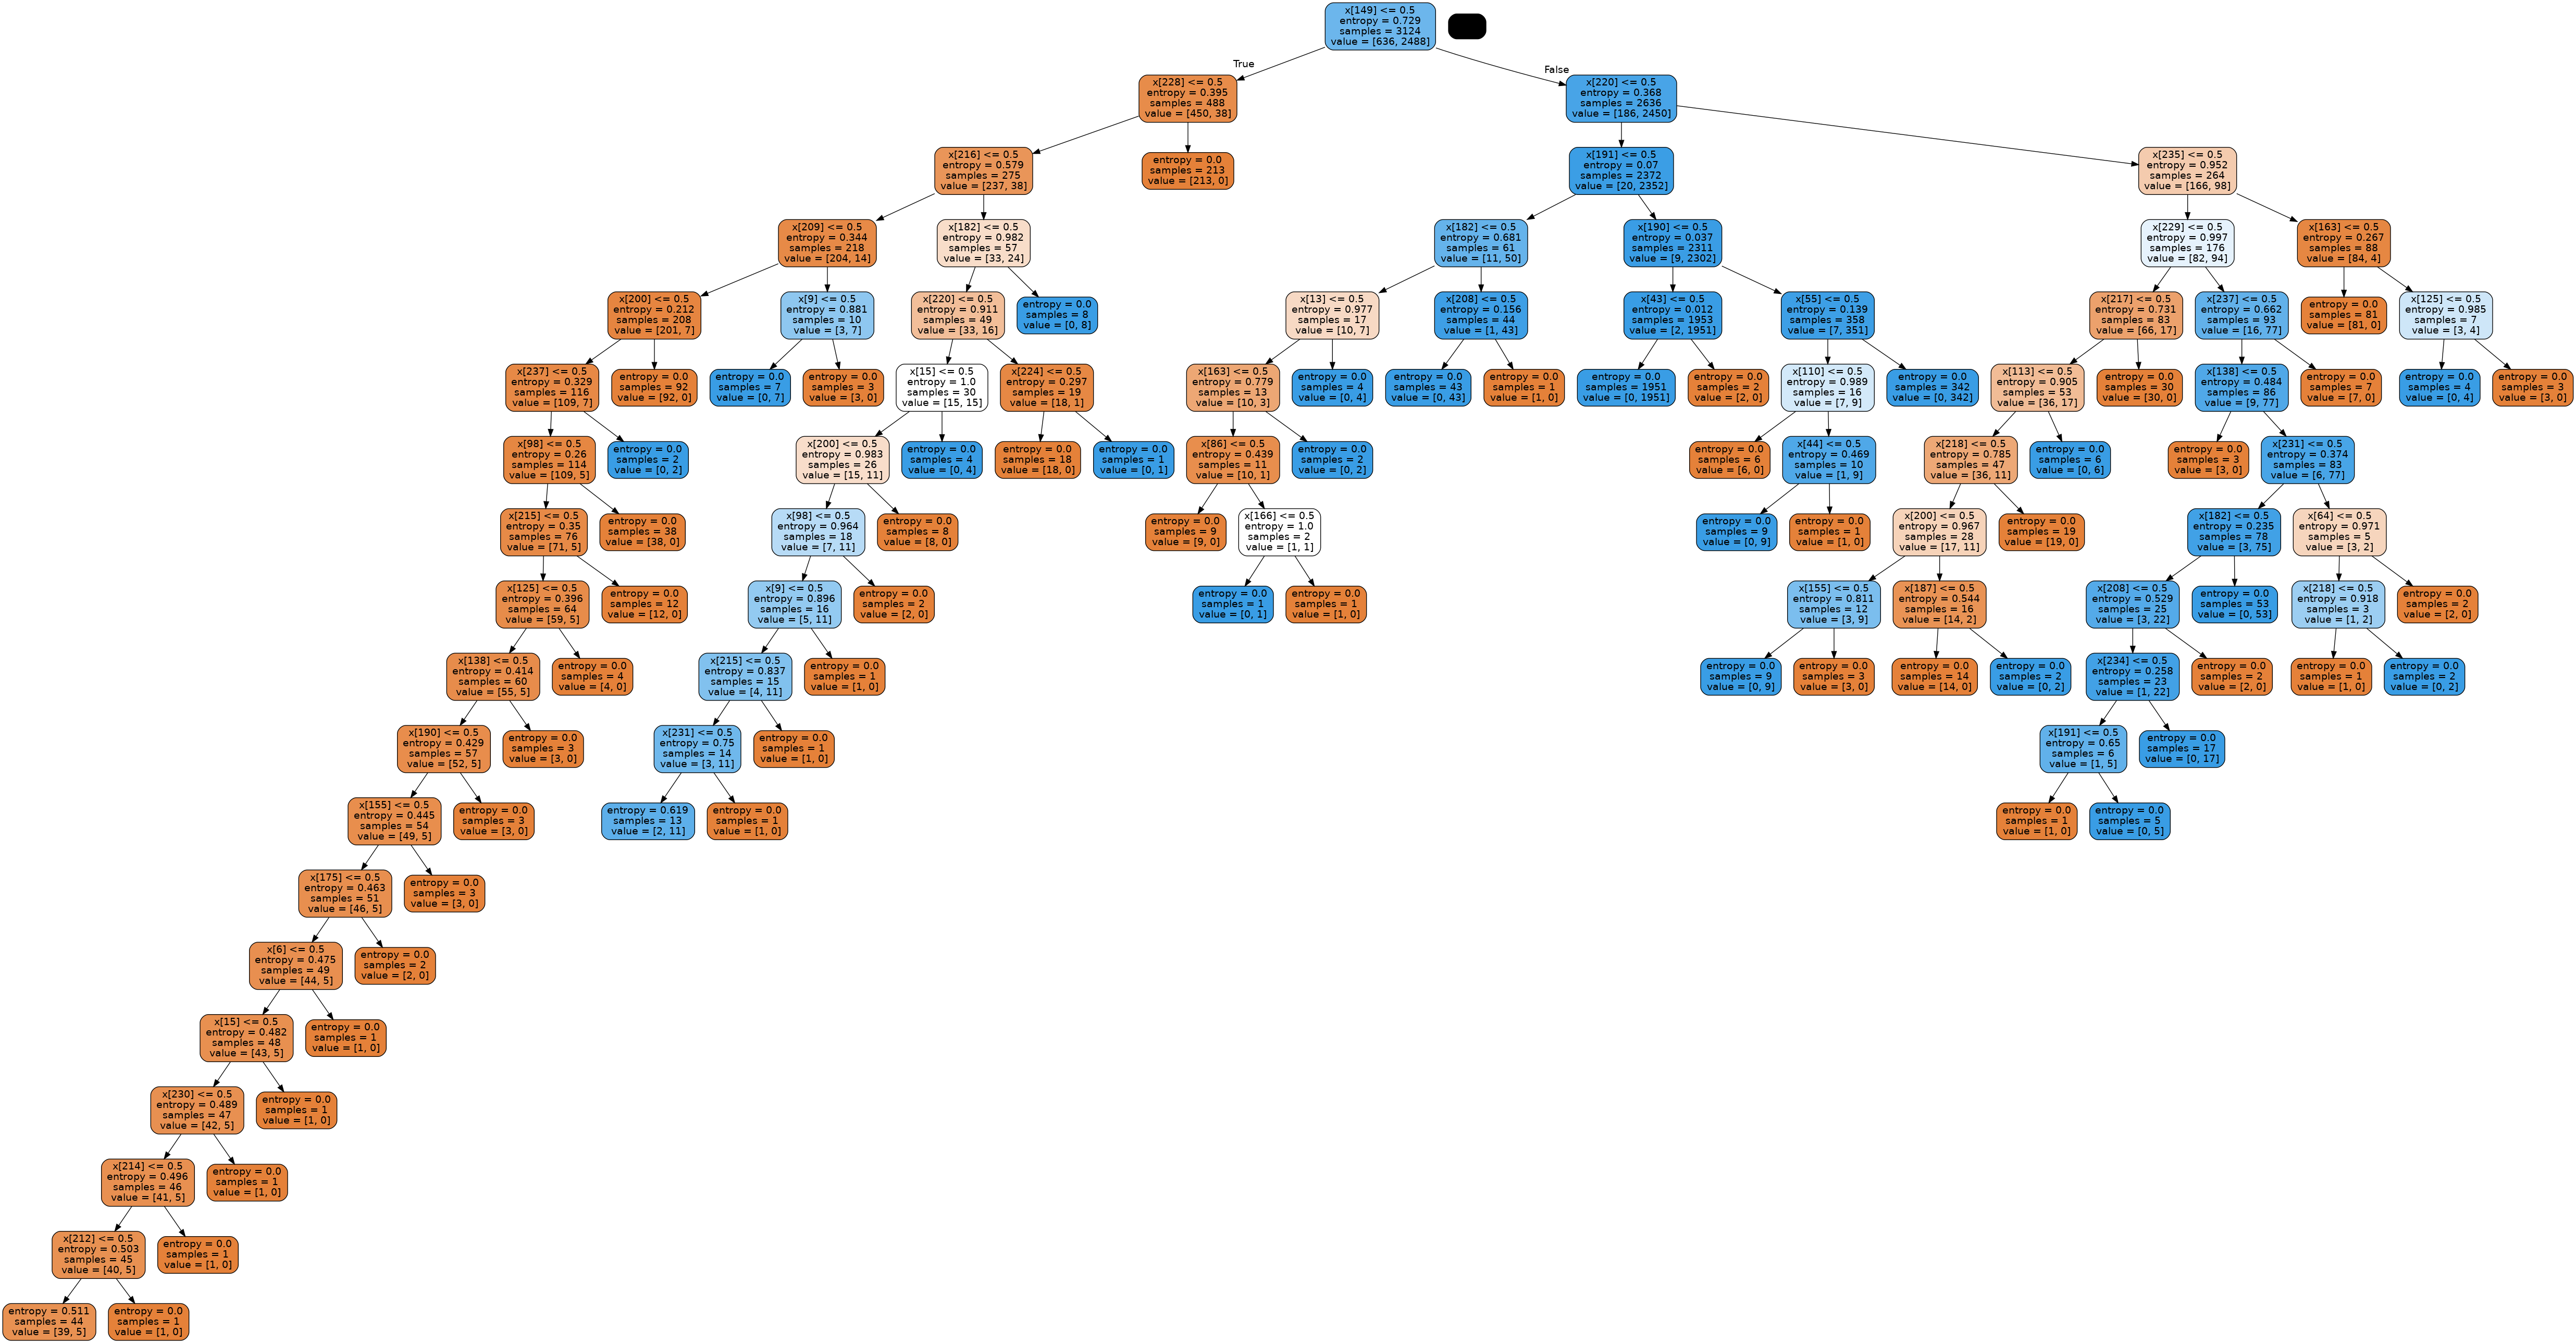

In [176]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dotfile = StringIO()
export_graphviz(model_ent, out_file=dotfile, filled=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("malware_entropy.png")
print('Entropy Model')
Image(graph.create_png())

Gini Model


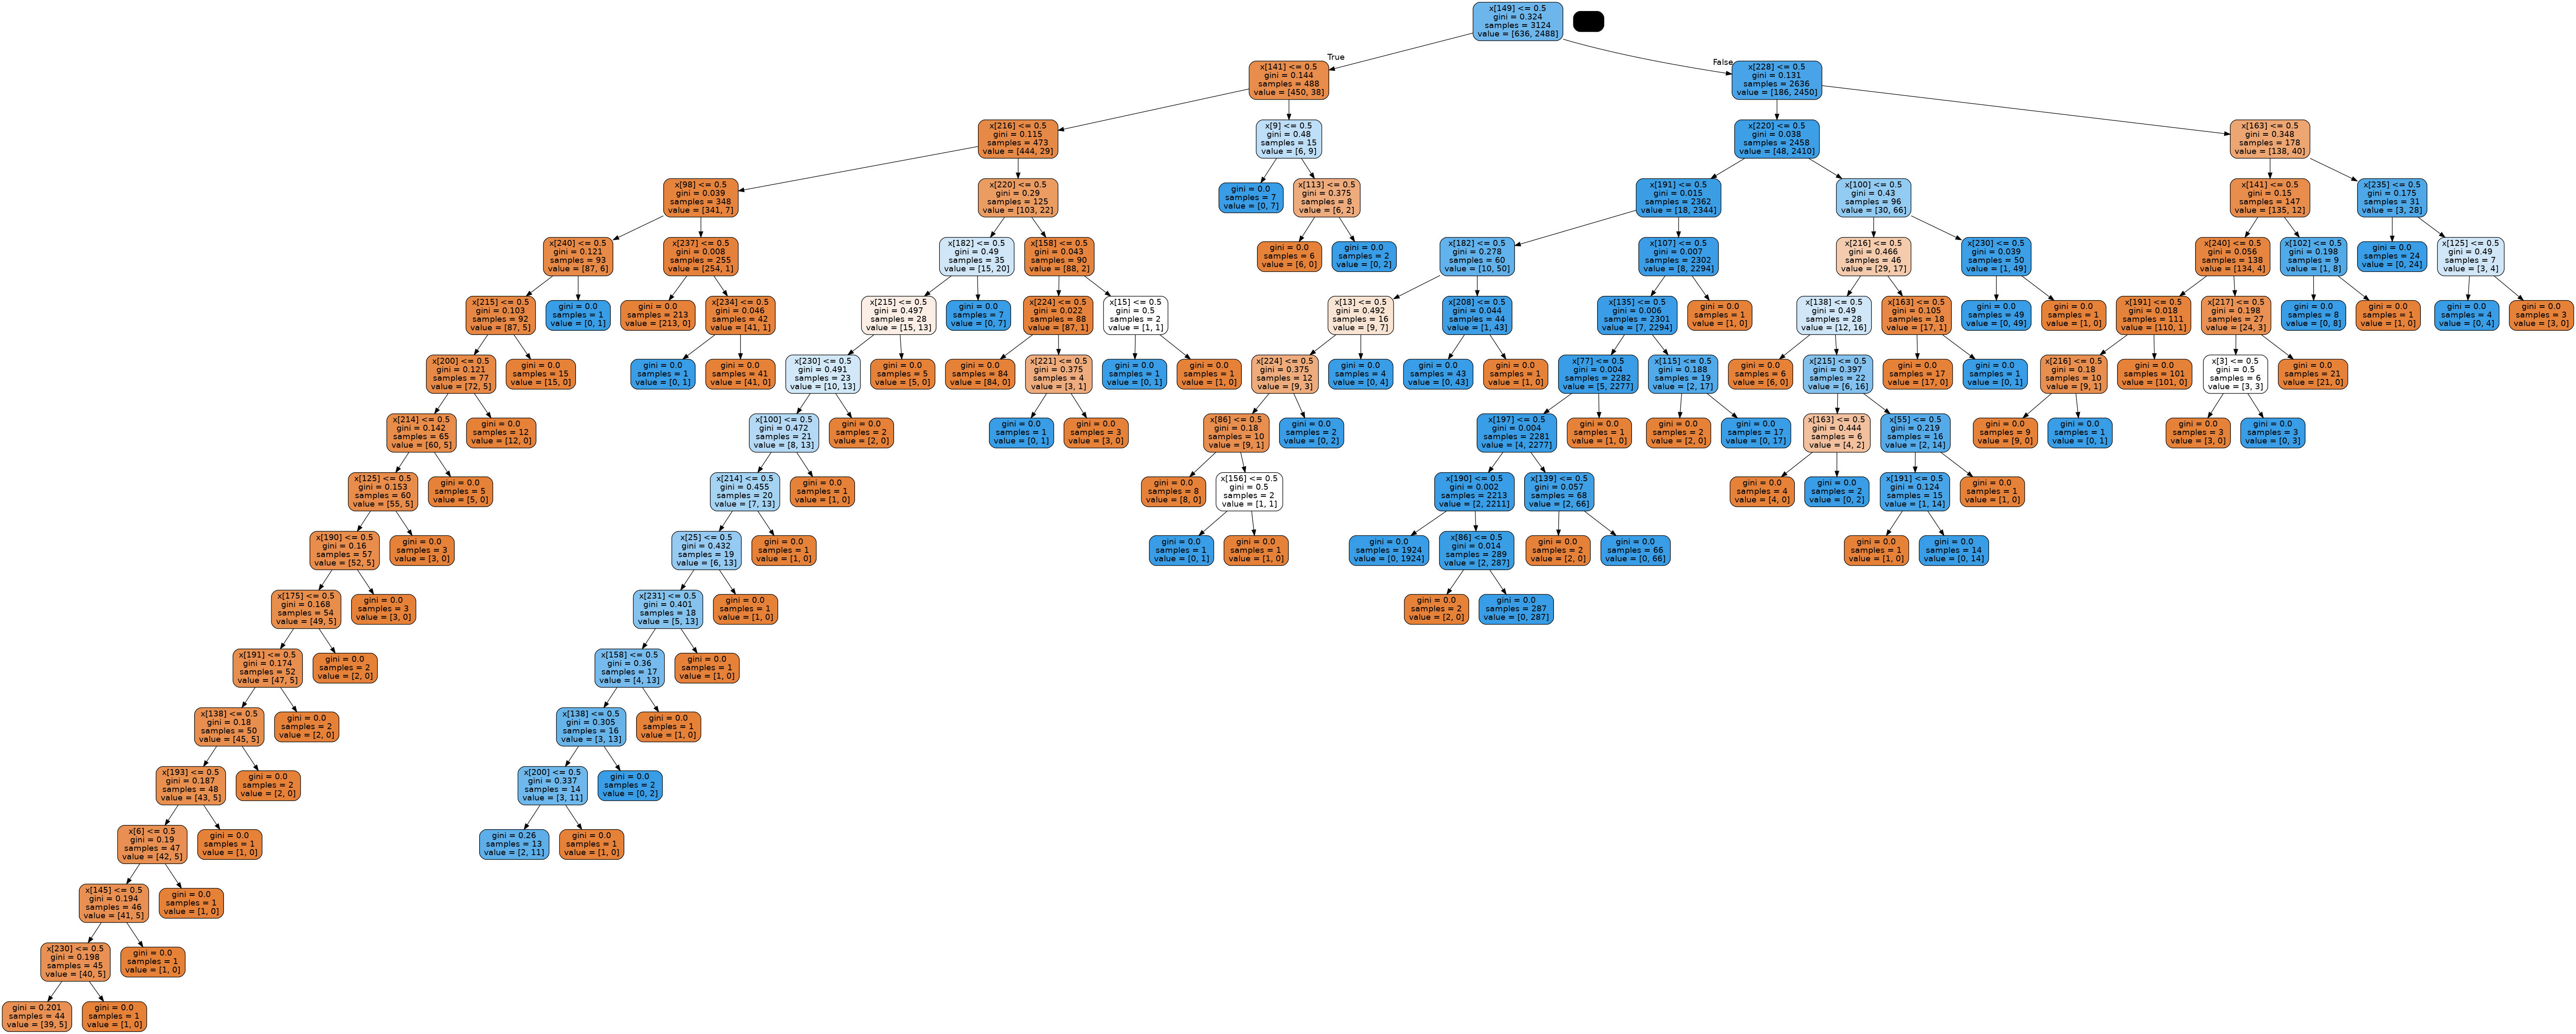

In [177]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dotfile = StringIO()
export_graphviz(model_gini, out_file=dotfile, filled=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("malware_gini.png")
print('Gini Model')
Image(graph.create_png())

In [178]:
# Testing shorter Trees - only entropy to see what actually changes

# Create Decision Tree classifer object - Normal height without max depth is ~14
s1 = DecisionTreeClassifier(criterion="entropy", max_depth=12)
s2 = DecisionTreeClassifier(criterion="entropy", max_depth=9)
s3 = DecisionTreeClassifier(criterion="entropy", max_depth=7)
s4 = DecisionTreeClassifier(criterion="entropy", max_depth=5)



# Train Decision Tree Classifer
model_s1 = s1.fit(X_train,y_train)
model_s2 = s2.fit(X_train,y_train)
model_s3 = s3.fit(X_train,y_train)
model_s4 = s4.fit(X_train,y_train)


#Predict the response for test dataset
y_pred_s1 = s1.predict(X_test)
y_pred_s2 = s2.predict(X_test)
y_pred_s3 = s3.predict(X_test)
y_pred_s4 = s4.predict(X_test)


#predict the response for the training set
train_predict_s1 = s1.predict(X_train)
train_predict_s2 = s2.predict(X_train)
train_predict_s3 = s3.predict(X_train)
train_predict_s4 = s4.predict(X_train)

In [179]:
# Model Accuracy, how often is the classifier correct?
# Model with entropy
print("Original Entropy Model\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_ent))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_ent))
print("\n\nS1\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_s1))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_s1))
print("\n\nS2\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_s2))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_s2))
print("\n\nS3\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_s3))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_s3))
print("\n\nS4\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_s4))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_s4))

Original Entropy Model
Accuracy train: 0.9977592829705506
Accuracy test: 0.9850746268656716


S1
Accuracy train: 0.9977592829705506
Accuracy test: 0.9888059701492538


S2
Accuracy train: 0.9961587708066582
Accuracy test: 0.9888059701492538


S3
Accuracy train: 0.9907170294494239
Accuracy test: 0.982089552238806


S4
Accuracy train: 0.9811139564660691
Accuracy test: 0.9731343283582089


In [180]:
# Testing for best height of Trees - only entropy to see what actually changes

# Create Decision Tree classifer object - Normal height without max depth is ~14
t7 = DecisionTreeClassifier(criterion="entropy", max_depth=7)
t8 = DecisionTreeClassifier(criterion="entropy", max_depth=8)
t9 = DecisionTreeClassifier(criterion="entropy", max_depth=9)
t10 = DecisionTreeClassifier(criterion="entropy", max_depth=10)
t11 = DecisionTreeClassifier(criterion="entropy", max_depth=11)



# Train Decision Tree Classifer
model_t7 = t7.fit(X_train,y_train)
model_t8 = t8.fit(X_train,y_train)
model_t9 = t9.fit(X_train,y_train)
model_t10 = t10.fit(X_train,y_train)
model_t11 = t11.fit(X_train,y_train)


#Predict the response for test dataset
y_pred_t7 = t7.predict(X_test)
y_pred_t8 = t8.predict(X_test)
y_pred_t9 = t9.predict(X_test)
y_pred_t10 = t10.predict(X_test)
y_pred_t11 = t11.predict(X_test)


#predict the response for the training set
train_predict_t7 = t7.predict(X_train)
train_predict_t8 = t8.predict(X_train)
train_predict_t9 = t9.predict(X_train)
train_predict_t10 = t10.predict(X_train)
train_predict_t11 = t11.predict(X_train)

In [181]:
# Model Accuracy, Which max depth works best - not over or underfitting
# Model with entropy
print("7 Layer Tree\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_t7))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_t7))
print("\n\n8 Layer Tree\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_t8))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_t8))
print("\n\n9 Layer Tree\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_t9))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_t9))
print("\n\n10 Layer Tree\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_t10))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_t10))
print("\n\n11 Layer Tree\nAccuracy train:",metrics.accuracy_score(y_train, train_predict_t11))
print("Accuracy test:",metrics.accuracy_score(y_test, y_pred_t11))

7 Layer Tree
Accuracy train: 0.9907170294494239
Accuracy test: 0.9843283582089553


8 Layer Tree
Accuracy train: 0.9945582586427657
Accuracy test: 0.9850746268656716


9 Layer Tree
Accuracy train: 0.9967989756722151
Accuracy test: 0.9888059701492538


10 Layer Tree
Accuracy train: 0.9971190781049936
Accuracy test: 0.9843283582089553


11 Layer Tree
Accuracy train: 0.9977592829705506
Accuracy test: 0.9880597014925373


9 Layer Tree (Best fit for no underfitting and no overfitting)


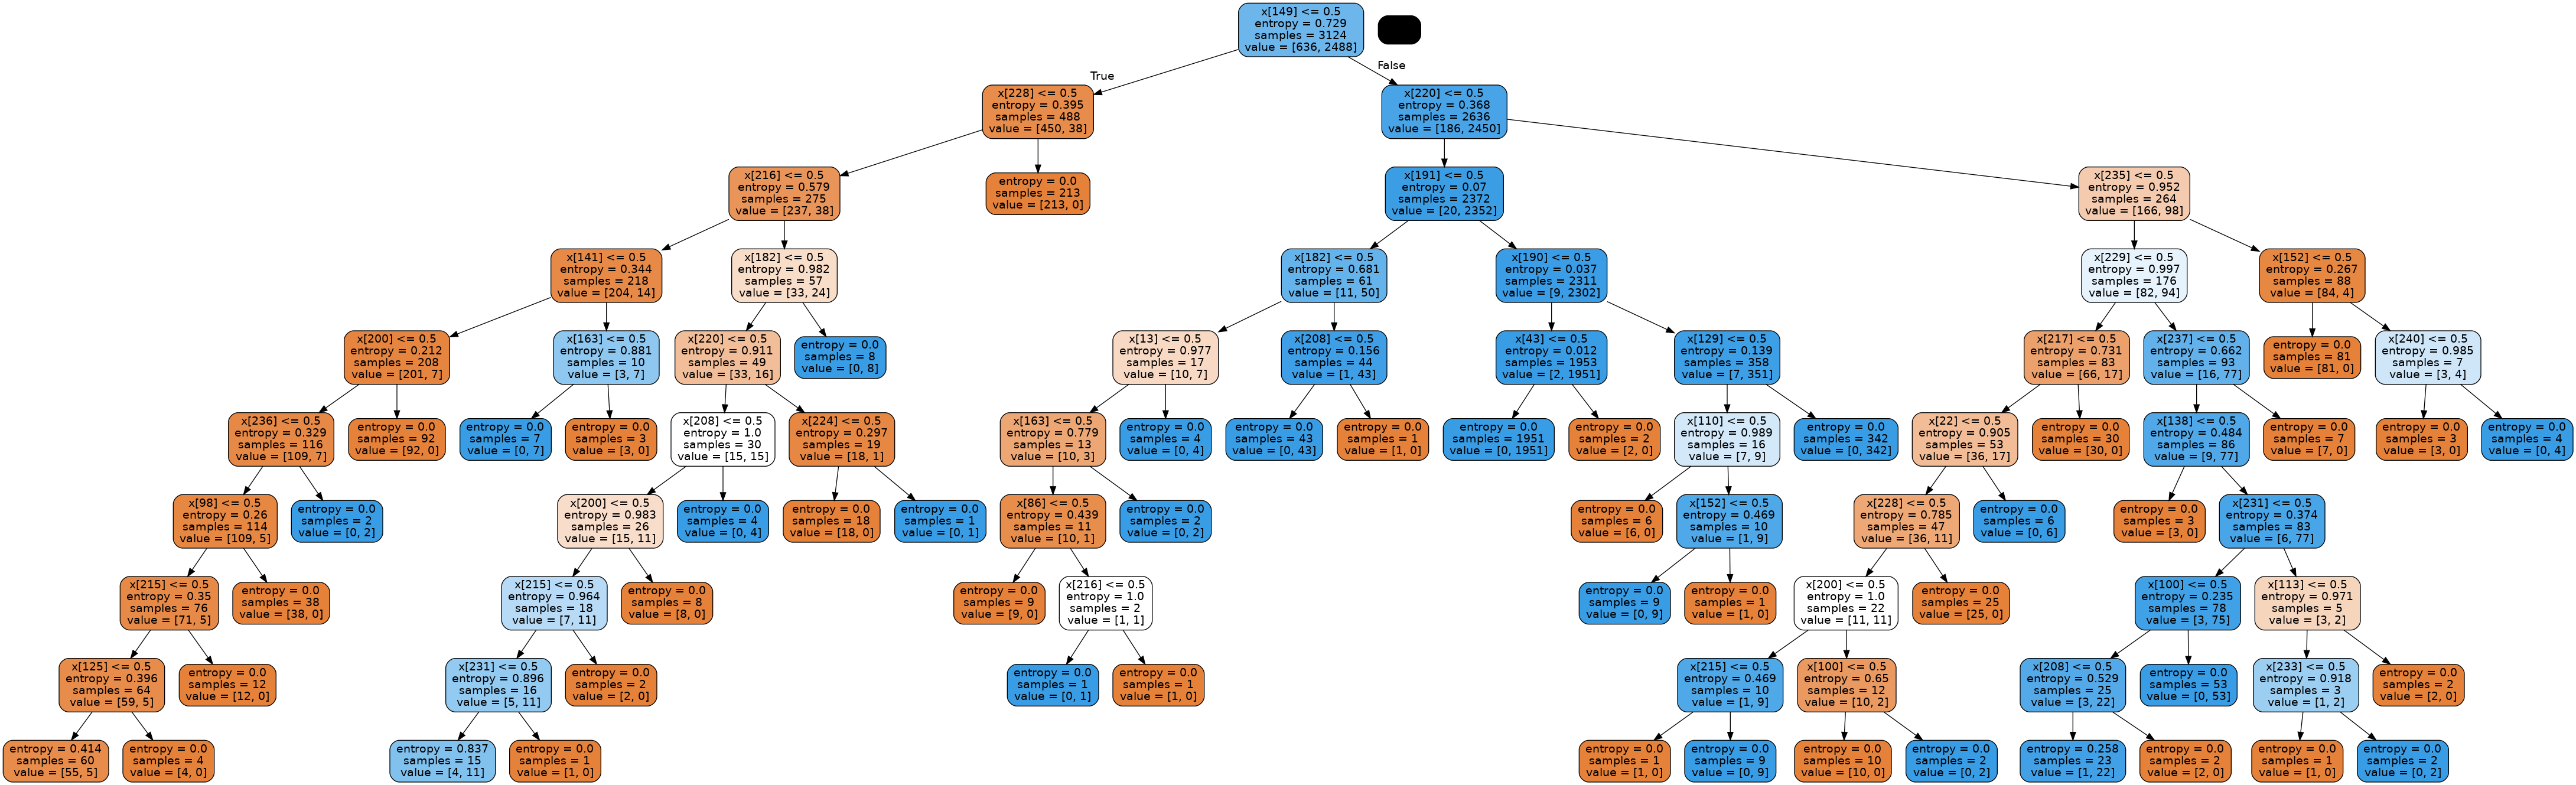

In [182]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

dotfile = StringIO()
export_graphviz(model_t9, out_file=dotfile, filled=True, rounded=True)
graph=pydotplus.graph_from_dot_data(dotfile.getvalue())
graph.write_png("malware_entropy_9_layer.png")
print('9 Layer Tree (Best fit for no underfitting and no overfitting)')
Image(graph.create_png())

# Conclusion on Malware Data
<p>From the different paths explored, it appears as if entropy trees usually do slightly better than the gini counterparts for this malware data (which is why entropy was used later); however, it is almost too close to say that one is significantly better overall. I tried with multiple different sets of the data, and almost every time (except the last run above) entropy did slightly better.
<br/><br/>
Testing with entropy and this specific set of the data, a 9 layered tree does the best job with the least amount of overfitting and underfitting, since it has the highest testing accuracy and the least difference between training and testing accuracy. This can be seen when comparing the different layers from 7 to 11
</p>

#### Note: if run again, some of these statistics may not seem correct since the best max depth tree will be specifically for a certain set of data which is created on the last run (ie: Sometimes 9 layer might not be the best)